In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [5]:
tokenizer = Tokenizer()

data = open('dataset/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)

2690


In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [8]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [16]:
print(xs[7])
print(xs[8])
print(ys[7])
print(ys[7,15])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 11]
[ 0  0  0  0  0  0  0  0  0  0  0  0  2 11 15]
[0. 0. 0. ... 0. 0. 0.]
1.0


In [32]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=15, verbose=1)
#print model.summary()
print(model)

Epoch 1/15


C:\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


377/377 [==============================] - 11s 23ms/step - loss: 6.6345 - accuracy: 0.0733
Epoch 2/15
377/377 [==============================] - 9s 23ms/step - loss: 5.7742 - accuracy: 0.1153
Epoch 3/15
377/377 [==============================] - 9s 23ms/step - loss: 4.8786 - accuracy: 0.1666
Epoch 4/15
377/377 [==============================] - 8s 22ms/step - loss: 3.9651 - accuracy: 0.2373
Epoch 5/15
377/377 [==============================] - 9s 25ms/step - loss: 3.4063 - accuracy: 0.3140
Epoch 6/15
377/377 [==============================] - 9s 23ms/step - loss: 3.0808 - accuracy: 0.3591
Epoch 7/15
377/377 [==============================] - 9s 23ms/step - loss: 2.2513 - accuracy: 0.4822
Epoch 8/15
377/377 [==============================] - 9s 23ms/step - loss: 1.8324 - accuracy: 0.5649
Epoch 9/15
377/377 [==============================] - 9s 23ms/step - loss: 1.5150 - accuracy: 0.6371
Epoch 10/15
377/377 [==============================] - 9s 23ms/step - loss: 1.2928 - accuracy: 0.6868

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

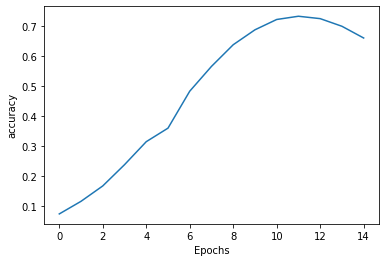

In [35]:
plot_graphs(history, 'accuracy')

In [38]:
seed_text = "Yesterday I"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted_index = np.argmax(predicted)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted_index:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Yesterday I met a cabin found for paddy never turn to the dead winds of my first morn in this i went to her house in vogue on the rocky road to dublin town today tree to tree in love grows or water is hunt the cornwall wall miss room most room would me deny when more games girded on tree tree tree tree to tree more tree tree to tree tree tree tree tree to shoes solace wearin all kinds of nonsensical polkas and drawn there or writin in love my mind being love they love me right than miss stout
